In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
dataset = pd.read_csv('1688197964airpassengers.csv', index_col ='Month', parse_dates= True)

In [ ]:
# import data
dataset_train = pd.read_csv('1688197964airpassengers.csv')
dataset_train.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
#keras only takes numpy array
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
training_set.shape

(144, 1)

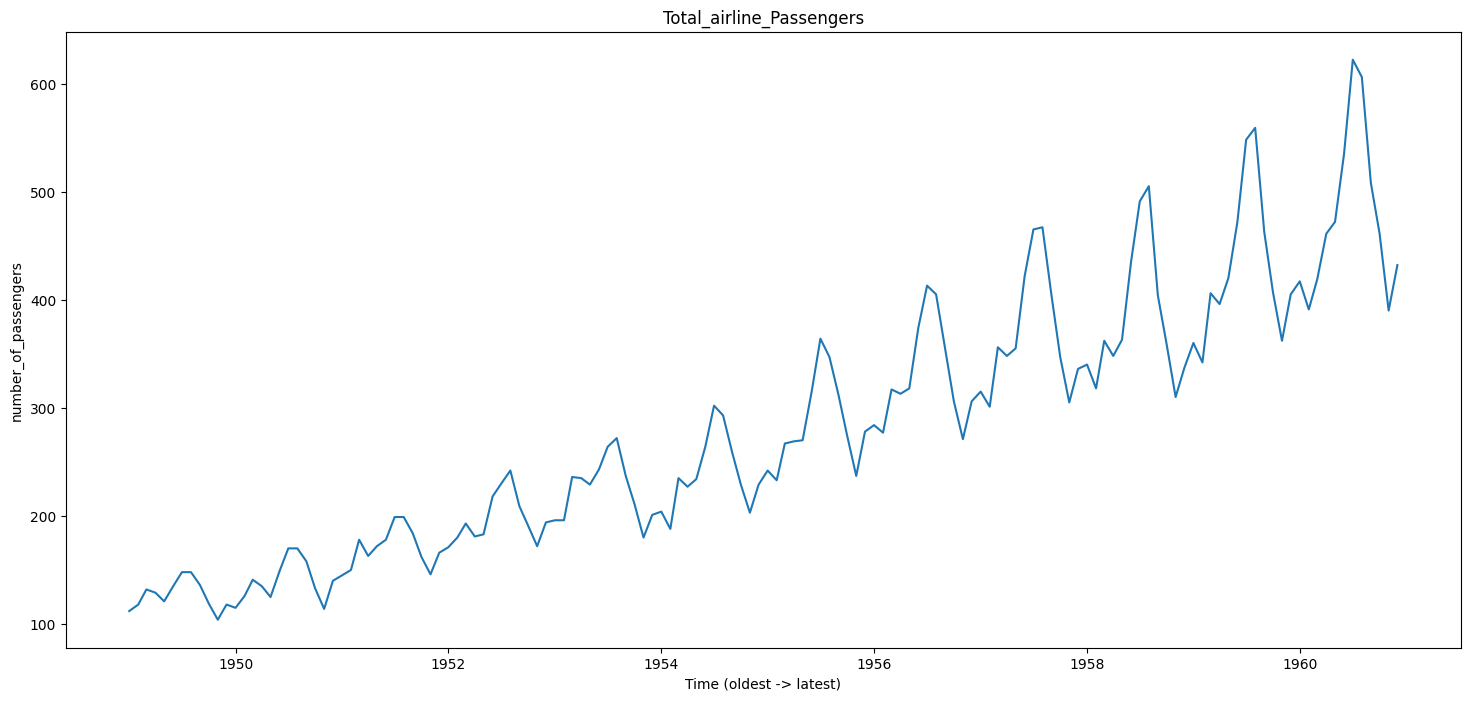

In [ ]:
#Ploting
plt.figure(figsize=(18, 8))
plt.plot(dataset)
plt.title("Total_airline_Passengers")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("number_of_passengers")
plt.show()

In [ ]:
#Scaling the data
# feature scaling
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set = sc.fit_transform(dataset)

In [ ]:
training_set_scaled=training_set

In [ ]:
### spliting the dat
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(84, 60)

In [ ]:
y_train.shape

(84,)

##  Data reshaping

In [ ]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(84, 60, 1)

###   Create the model

In [ ]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 75 neurons
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 75, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 75, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

##   fitting the model

In [ ]:
regressor.fit(x = X_train, y = y_train, batch_size = 1, epochs = 450)

Epoch 1/450
84/84 [==============================] - 8s 12ms/step - loss: 0.0416
Epoch 2/450
84/84 [==============================] - 1s 12ms/step - loss: 0.0246
Epoch 3/450
84/84 [==============================] - 1s 11ms/step - loss: 0.0210
Epoch 4/450
84/84 [==============================] - 1s 11ms/step - loss: 0.0169
Epoch 5/450
84/84 [==============================] - 1s 12ms/step - loss: 0.0226
Epoch 6/450
84/84 [==============================] - 1s 12ms/step - loss: 0.0182
Epoch 7/450
84/84 [==============================] - 1s 12ms/step - loss: 0.0184
Epoch 8/450
84/84 [==============================] - 1s 16ms/step - loss: 0.0172
Epoch 9/450
84/84 [==============================] - 1s 14ms/step - loss: 0.0140
Epoch 10/450
84/84 [==============================] - 1s 12ms/step - loss: 0.0216
Epoch 11/450
84/84 [==============================] - 1s 12ms/step - loss: 0.0183
Epoch 12/450
84/84 [==============================] - 1s 12ms/step - loss: 0.0203
Epoch 13/450
84/84 [=====

##  Model read and convert

In [ ]:
dataset_test = pd.read_csv('1688197964airpassengers.csv')
dataset_test.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
#keras only takes numpy array
real_passengers = dataset_test.iloc[:, 1:2].values
real_passengers.shape

(144, 1)

##  Concat and convert

In [ ]:
#vertical concat use 0, horizontal uses 1
dataset_total = pd.concat((dataset_train['#Passengers'], dataset_test['#Passengers']), axis = 0)
dataset_total.shape

(288,)

In [ ]:
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [ ]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)
#scale input
inputs = sc.transform(inputs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
len(inputs)

204

In [ ]:
inputs

array([[0.34749035],
       [0.33397683],
       [0.41119691],
       [0.4034749 ],
       [0.41312741],
       [0.52123552],
       [0.5965251 ],
       [0.58108108],
       [0.48455598],
       [0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888],
       [0.48648649],
       [0.47104247],
       [0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.581

##   Model prediction

In [ ]:
X_test=[]
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_test.shape

(144, 60, 1)

In [ ]:
predicted_passengers = regressor.predict(X_test)

5/5 [==============================] - 2s 11ms/step


###  inverse transform

In [ ]:
#inverse the scaled value
predicted_passengers = sc.inverse_transform(predicted_passengers)

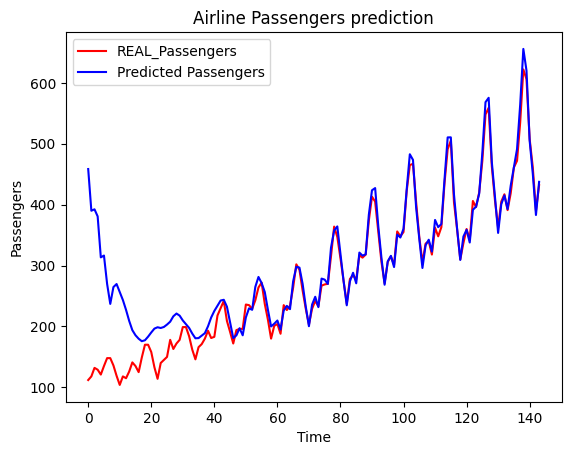

In [ ]:
##visualize the prediction and real price
plt.plot(real_passengers, color = 'red', label = 'REAL_Passengers')
plt.plot(predicted_passengers, color = 'blue', label = 'Predicted Passengers')

plt.title('Airline Passengers prediction')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [ ]:
#predicted_passengers

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(real_passengers, predicted_passengers)
print("MSE:", mse)

MSE: 3971.059431220861


In [ ]:
rmse = mean_squared_error(real_passengers, predicted_passengers, squared=False)
print("RMSE:", rmse)

RMSE: 63.01634257254907
